In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

data = sm.datasets.engel.load_pandas().data
data.head()

,income,foodexp
0,420.157651,255.839425
1,541.411707,310.958667
2,901.157457,485.680014
3,639.080229,402.997356
4,750.875606,495.560775


In [3]:
#Least Regression
mod = smf.quantreg('foodexp ~ income', data)
res = mod.fit(q=.5)
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                foodexp   Pseudo R-squared:               0.6206
Model:                       QuantReg   Bandwidth:                       64.51
Method:                 Least Squares   Sparsity:                        209.3
Date:                Thu, 05 Mar 2020   No. Observations:                  235
Time:                        09:05:46   Df Residuals:                      233
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     81.4823     14.634      5.568      0.000      52.649     110.315
income         0.5602      0.013     42.516      0.000       0.534       0.586

The condition number is large, 2.38e+03. This might indicate that there are
strong multicollinearity or other numerical problems.


In [26]:
quantiles = np.arange(.05, .96, .1)
def fit_model(q):
    res = mod.fit(q=q)
    return [q, res.params['Intercept'], res.params['income']] + \
            res.conf_int().loc['income'].tolist()

models = [fit_model(x) for x in quantiles]
models = pd.DataFrame(models, columns=['quantile', 'Intercept', 'parametre_income', 'confidence_interval_low', 'confidence_interval_high'])

ols = smf.ols('foodexp ~ income', data).fit()
ols_ci = ols.conf_int().loc['income'].tolist()
ols = dict(Intercept = ols.params['Intercept'],
           parametre_income = ols.params['income'],
           lb = ols_ci[0],
           ub = ols_ci[1])

print(models)
print(ols)

   quantile   Intercept  parametre_income  confidence_interval_low  \
0      0.05  124.880096          0.343361                 0.268632   
1      0.15  111.693660          0.423708                 0.382780   
2      0.25   95.483539          0.474103                 0.439900   
3      0.35  105.841294          0.488901                 0.457759   
4      0.45   81.083647          0.552428                 0.525021   
5      0.55   89.661370          0.565601                 0.540955   
6      0.65   74.033435          0.604576                 0.582169   
7      0.75   62.396584          0.644014                 0.622411   
8      0.85   52.272216          0.677603                 0.657383   
9      0.95   64.103964          0.709069                 0.687831   

   confidence_interval_high  
0                  0.418090  
1                  0.464636  
2                  0.508306  
3                  0.520043  
4                  0.579835  
5                  0.590247  
6                  

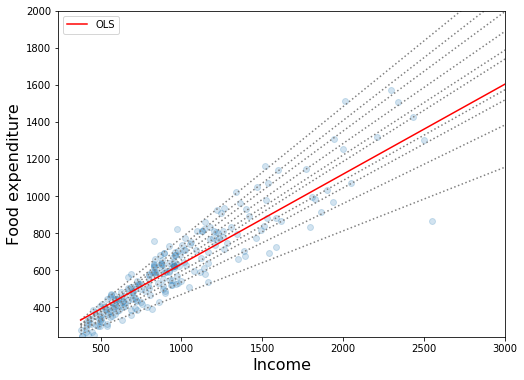

In [29]:
a="Intercept"
b="parametre_income"
x = np.arange(data.income.min(), data.income.max(), 50)
get_y = lambda Intercept, parametre_income: Intercept + parametre_income * x

fig, ax = plt.subplots(figsize=(8, 6))

for i in range(models.shape[0]):
    y = get_y(models.Intercept[i], models.parametre_income[i])
    ax.plot(x, y, linestyle='dotted', color='grey')

y = get_y(ols['Intercept'], ols['parametre_income'])

ax.plot(x, y, color='red', label='OLS')
ax.scatter(data.income, data.foodexp, alpha=.2)
ax.set_xlim((240, 3000))
ax.set_ylim((240, 2000))
legend = ax.legend()
ax.set_xlabel('Income', fontsize=16)
ax.set_ylabel('Food expenditure', fontsize=16);

In [18]:
res.conf_int().loc['income'].tolist()

,0,1
Intercept,52.649449,110.315062
income,0.534222,0.586139


In [25]:
ols

{'a': 147.4753885237058,
 'b': 0.4851784236769232,
 'lb': 0.45687381301842295,
 'ub': 0.5134830343354234}